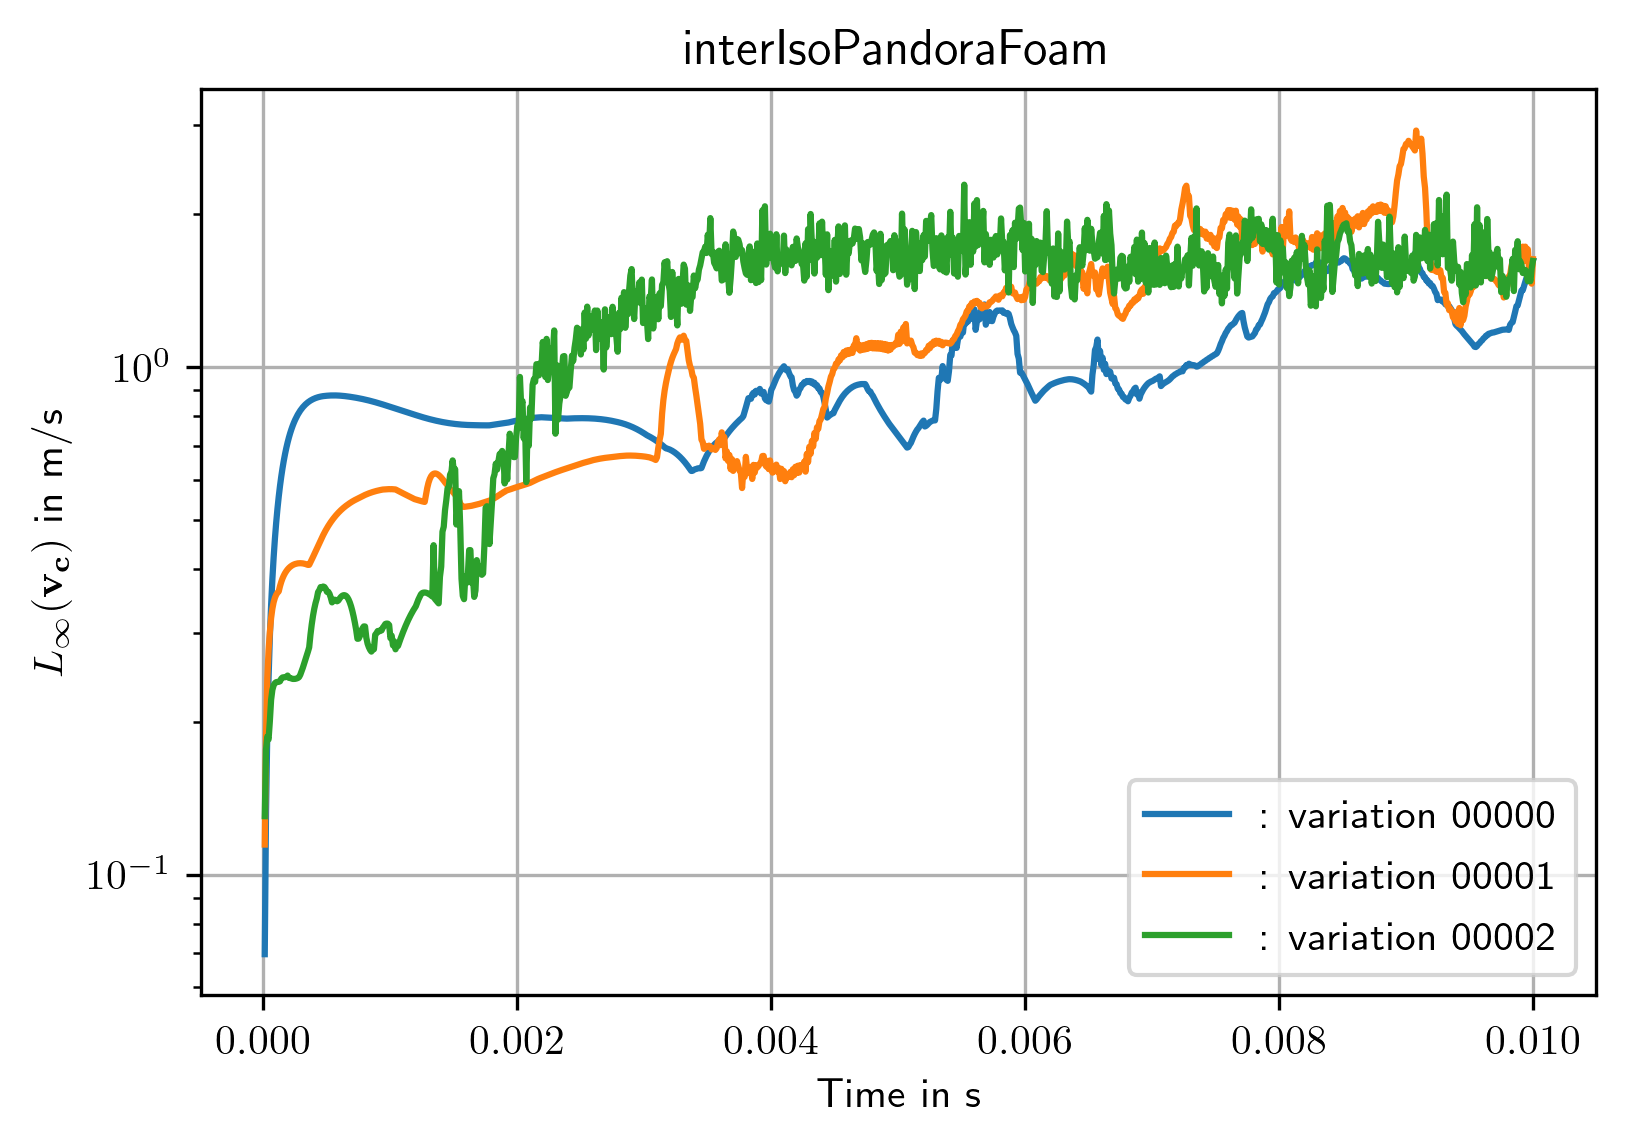

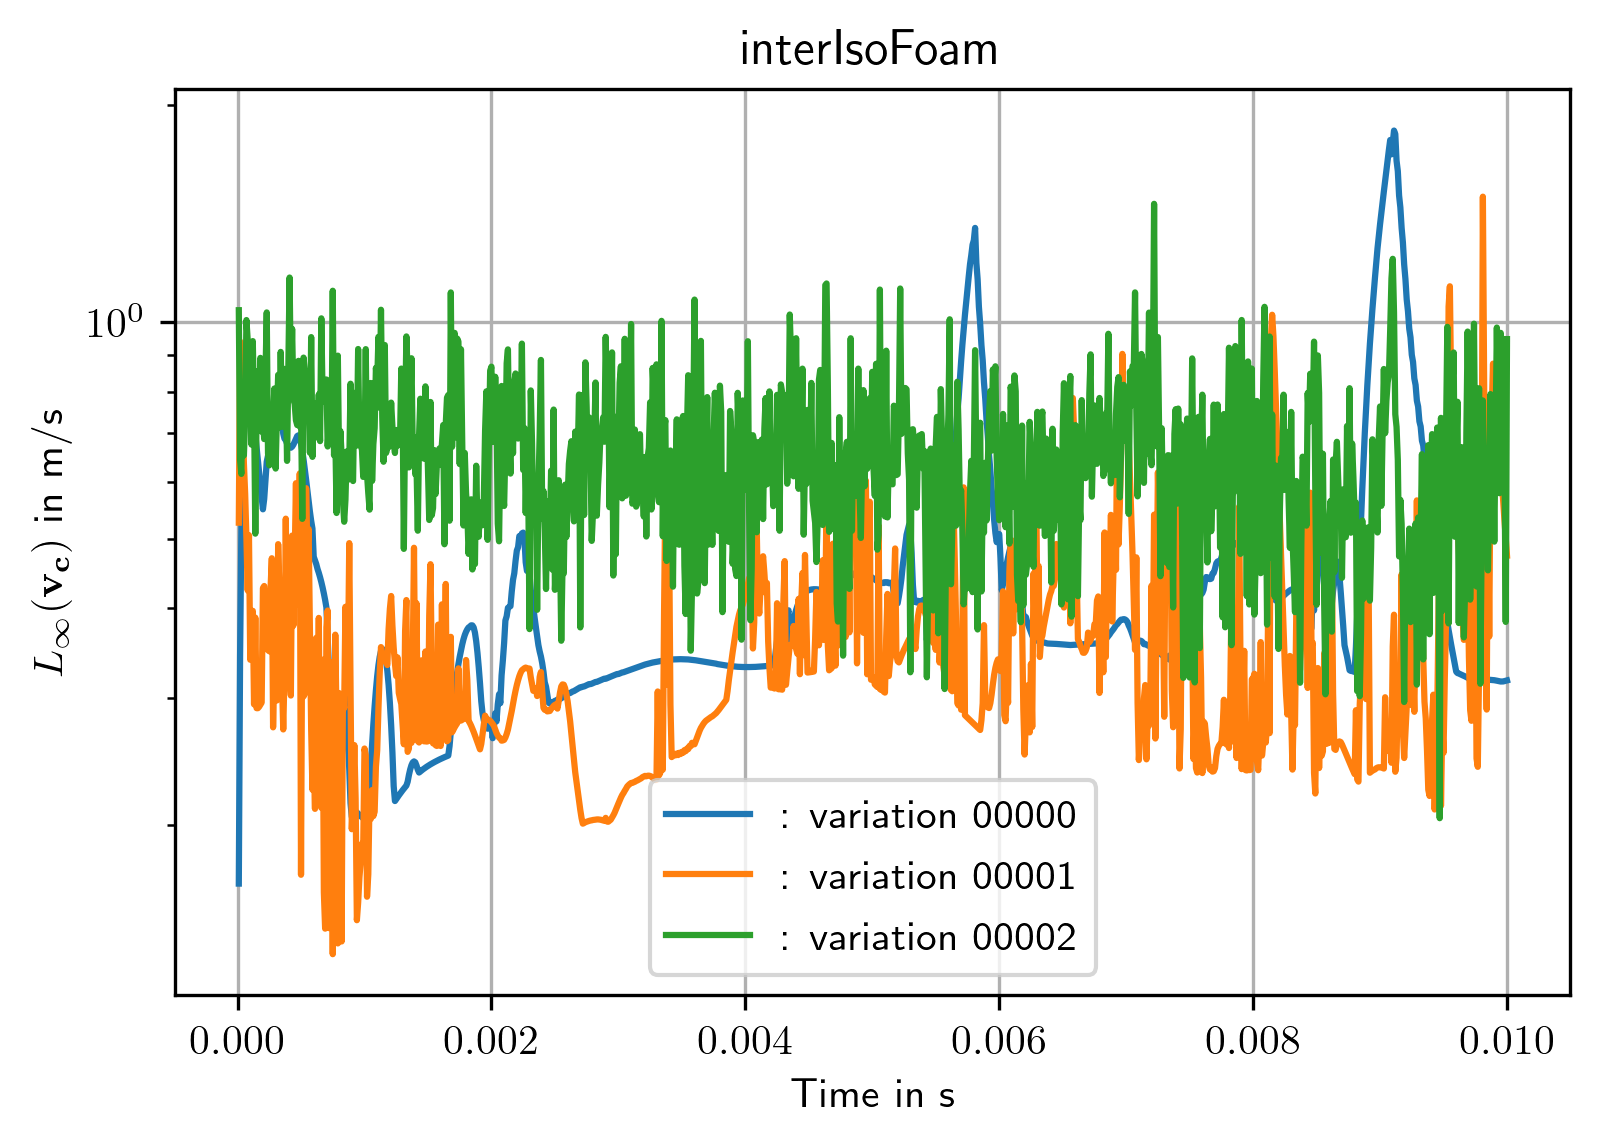

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["figure.dpi"] = 300
rcParams["text.usetex"] = True

solvers = ["interIsoPandoraFoam", "interIsoFoam"]
#solvers = ["interIsoFoam"]
solver_dat_files = []

for solver_name in solvers:
    dirs = [param_dir for param_dir in os.listdir(os.curdir) if ("_00" in param_dir and solver_name in param_dir)]
    files = [os.path.join(param_dir,"postProcessing/minMaxU/0/fieldMinMax.dat") for param_dir in dirs]
    files.sort()
    solver_dat_files.append(files)
    
for solver, dat_files in zip(solvers, solver_dat_files):
    fig, ax = plt.subplots()
    for dat_file in dat_files:
        dFrame = pd.read_table(dat_file, header=1)
        dFrame.columns = [column.rstrip(' ') for column in dFrame.columns]
        dFrame.columns = ["Time"] + list(dFrame.columns[1:])
        name = dat_file.split('/')[0].split('_')[1]
        ax.plot(dFrame["Time"], dFrame["max"], label=": variation %s" % name)
    
    ax.semilogy()
    ax.legend()
    ax.grid()
    ax.set_ylabel("$L_\infty(\mathbf{v_c})$ in m/s")
    ax.set_xlabel("Time in s")
    ax.set_title(solver)
    fig.savefig(solver+".pdf",bbox_inches='tight')